**Tabla de contenido**

- [Definiendo el modelo de media móvil integrada autorregresiva](#Definiendo-el-modelo-de-media-movil-integrada-autorregresiva)
- [Modificar el procedimiento general de modelado para tener en cuenta series no estacionarias](#Modificar-el-procedimiento-general-de-modelado-para-tener-en-cuenta-series-no-estacionarias)
 - [Pronosticando una serie de tiempo no estacionaria](#Pronosticando-una-serie-de-tiempo-no-estacionaria)
 - [Próximos pasos](#Proximos-pasos)
 - [Resumen](#Resumen)

En los capítulos 4, 5 y 6 cubrimos el modelo de media móvil, MA(q); el modelo autorregresivo, AR(p); y el modelo ARMA, ARMA(p,q). Vimos cómo estos modelos solo se pueden utilizar para series temporales estacionarias, lo que nos obligó a aplicar transformaciones, principalmente diferenciación, y a probar la estacionariedad utilizando la prueba ADF. En los ejemplos que cubrimos, las predicciones de cada modelo devolvieron valores diferenciados, lo que nos requirió invertir esta transformación para llevar los valores de vuelta a la escala de los datos originales.

Ahora agregaremos otro componente al modelo ARMA(p,q) para poder pronosticar series temporales no estacionarias. Este componente es el orden de integración, que se denota por la variable d. Esto nos lleva al modelo de media móvil integrada autorregresiva (ARIMA), o ARIMA(p,d,q). Usando este modelo, podemos tener en cuenta series temporales no estacionarias y evitar los pasos de modelar en datos diferenciados y tener que realizar la transformación inversa de los pronósticos.

En este capítulo, definiremos el modelo ARIMA(p,d,q) y el orden de integración d. Luego, añadiremos un paso a nuestro procedimiento general de modelado. La siguiente Figura muestra el procedimiento general de modelado como se definió en el capítulo 6.

![Modelado](fig/pmodelado.png)

Debemos añadir un paso para determinar el orden de integración a fin de utilizar este procedimiento con el modelo ARIMA(p,d,q).

# Definiendo el modelo de media movil integrada autorregresiva

Un proceso autoregresivo integrado de medias móviles es la combinación de un proceso autoregresivo AR(p), integración I(d) y el proceso de media móvil MA(q).

Al igual que el proceso ARMA, el proceso ARIMA establece que el valor presente depende de los valores pasados, provenientes de la porción AR(p), y de los errores pasados, que provienen de la porción MA(q). Sin embargo, en lugar de utilizar la serie original, denotada como $yt$, el proceso ARIMA utiliza la serie diferenciada, denotada como $y'_t$. Cabe señalar que $y'_t$ puede representar una serie que ha sido diferenciada más de una vez.

Por lo tanto, la expresión matemática del proceso ARIMA(p,d,q) establece que el valor presente de la serie diferenciado $y'_t$ es igual a la suma de una constante $C$, valores pasados de la serie diferenciada $φ_py'_{t–p}$, la media de la serie diferenciada $µ$, términos de error pasados $θ_qϵ_{t–q}$, y un término de error actual $ϵ_t$, como se muestra en la siguiente ecuación.
$$y'_t = C + φ_1y'_{t–1} +⋅⋅⋅ φ_py'_{t–p} + θ_1ϵ'_{t–1} +⋅⋅⋅+ θ_qϵ'_{t–q} + ϵ_t$$

Al igual que en el proceso ARMA, `el orden p` determina `cuántos valores rezagados de la serie se incluyen en el modelo`, mientras que el `orden q` determina `cuántos términos de error rezagados se incluyen en el modelo`. Sin embargo, en la ecuación notarás que no hay un orden d explícitamente mostrado.

Si diferenciamos una serie una vez y se vuelve estacionaria, entonces d = 1. Si una serie se diferencia dos veces para volverse estacionaria, entonces d = 2.

Una serie temporal que se puede hacer estacionaria aplicando diferencias se dice que es una serie integrada. En la presencia de una serie temporal integrada no estacionaria, podemos usar el modelo ARIMA(p,d,q) para producir pronósticos.

Así, en términos simples, el modelo `ARIMA es simplemente un modelo ARMA que se puede aplicar a series temporales no estacionarias`. Mientras que el modelo ARMA(p,q) requiere que la serie sea estacionaria antes de ajustar un modelo ARMA(p,q), el modelo ARIMA(p,d,q) se puede utilizar en series no estacionarias. Simplemente debemos encontrar el orden de integración d, que corresponde al número mínimo de veces que una serie debe ser diferenciada para volverse estacionaria.

Por lo tanto, debemos añadir el paso de encontrar el orden de integración a nuestro procedimiento de modelado general. 

# Modificar el procedimiento general de modelado para tener en cuenta series no estacionarias

En el capítulo 6 construimos un procedimiento de modelado general que nos permitió modelar series temporales más complejas, lo que significa que la serie tiene tanto un componente autorregresivo como un componente de media móvil. Este procedimiento implica ajustar muchos modelos ARMA(p,q) y seleccionar el que tenga el AIC más bajo. Luego estudiamos los residuos del modelo para verificar que se asemejen a ruido blanco. Si ese es el caso, el modelo se puede utilizar para pronósticos. 

La próxima iteración del procedimiento de modelado general incluirá un paso para determinar el orden de integración d. De esa manera, podremos aplicar el mismo procedimiento pero utilizando un modelo ARIMA(p,d,q), lo que nos permitirá pronosticar series temporales no estacionarias.

A partir de la sección anterior, sabemos que el orden de integración d es simplemente el número mínimo de veces que una serie debe ser diferenciada para volverse estacionaria. Por lo tanto, si una serie es estacionaria después de ser diferenciada una vez, entonces d = 1. Si es estacionaria después de ser diferenciada dos veces, entonces d = 2. En mi experiencia, una serie temporal rara vez necesita ser diferenciada más de dos veces para volverse estacionaria.

Podemos agregar un paso de manera que, cuando se apliquen transformaciones a la serie, establezcamos el valor de d como el número de veces que se ha diferenciado la serie. Luego, en lugar de ajustar muchos modelos ARMA(p,q), ajustamos muchos modelos ARIMA(p,d,q). El resto del procedimiento sigue siendo el mismo, ya que seguimos utilizando el AIC para seleccionar el mejor modelo y estudiar sus residuos. 

`Tenga en cuenta que en el caso en que d = 0, es equivalente a un modelo ARMA(p,q). Esto también significa que la serie no necesitó ser diferenciada para ser estacionaria. También se debe especificar que el modelo ARMA(p,q) solo se puede aplicar a una serie estacionaria, mientras que el modelo ARIMA(p,d,q) se puede aplicar a una serie que no ha sido diferenciada.`


# Pronosticando una serie de tiempo no estacionaria

Ahora vamos a aplicar el procedimiento general de modelado, para predecir las ganancias por acción (EPS) trimestrales de Johnson & Johnson. Usaremos el mismo conjunto de datos que se presentó en los capítulos 1 y 2. Vamos a pronosticar las EPS trimestrales de 1 año, lo que significa que debemos pronosticar cuatro períodos en el futuro, ya que hay cuatro trimestres en un año. El conjunto de datos cubre el período entre 1960 y 1980.

![procedimentogeneralARIMA](fig/modeladogeneralARIMA.png)

Figura. Procedimiento general de modelado para usar el modelo ARIMA(p,d,q). Note la adición de un paso donde especificamos el parámetro d para el modelo ARIMA(p,d,q). Aquí, d es simplemente el número mínimo de veces que una serie debe ser diferenciada para volverse estacionaria.


In [4]:
import pandas as pd
import numpy as np
import os
path_file = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(path_file('jj.csv'))

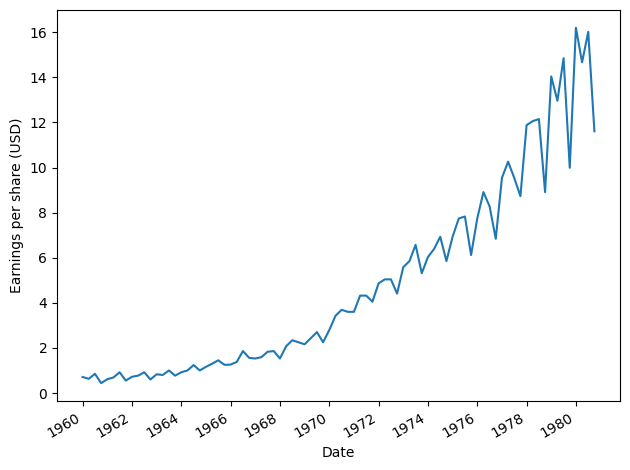

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972,1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

Siguiendo nuestro procedimiento, debemos verificar si los datos son estacionarios. La figura muestra una tendencia positiva, ya que el EPS trimestral tiende a aumentar con el tiempo. No obstante, podemos aplicar la prueba de Dickey-Fuller aumentada (ADF) para determinar si es estacionario o no.

In [6]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(df['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 2.7420165734574744
p-value: 1.0


Este bloque de código devuelve una estadística ADF de 2.74 con un valor p de 1.0. Dado que la estadística ADF no es un número negativo grande y el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula, lo que significa que nuestra serie no es estacionaria.

Necesitamos determinar cuántas veces debe diferenciarse la serie para volverse estacionaria. Esto establecerá el orden de integración d. Podemos aplicar una diferenciación de primer orden y probar la estacionariedad.

In [7]:
eps_diff = np.diff(df['data'], n=1)
ad_fuller_result = adfuller(eps_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.40740976363804615
p-value: 0.9088542416911305


Esto resulta en una estadística ADF de -0.41 y un valor p de 0.9. Nuevamente, la estadística ADF no es un número negativo grande, y el valor p es mayor que 0.05. Por lo tanto, no podemos rechazar la hipótesis nula y debemos concluir que después de una diferenciación de primer orden, la serie no es estacionaria.

Probemos la diferenciación nuevamente para ver si la serie se vuelve estacionaria:

In [8]:
eps_diff2 = np.diff(eps_diff, n=1)
ad_fuller_result = adfuller(eps_diff2)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.585162874793155
p-value: 0.006051099869603682


Esto resulta en una estadística ADF de -3.59 y un valor p de 0.006. Ahora que tenemos un valor p menor que 0.05 y una gran estadística ADF negativa, podemos rechazar la hipótesis nula y concluir que nuestra serie es estacionaria. `Se necesitaron dos rondas de diferenciación para hacer que nuestros datos sean estacionarios, lo que significa que nuestro orden de integración es 2, por lo que d = 2.`

Antes de pasar a ajustar diferentes combinaciones de modelos ARIMA(p,d,q), debemos separar nuestros datos en conjuntos de entrenamiento y prueba. Mantendremos el último año de datos para pruebas. Esto significa que ajustaremos el modelo con datos desde 1960 hasta 1979 y predeciremos el EPS trimestral en 1980 para evaluar la calidad de nuestro modelo en comparación con los valores observados en 1980.

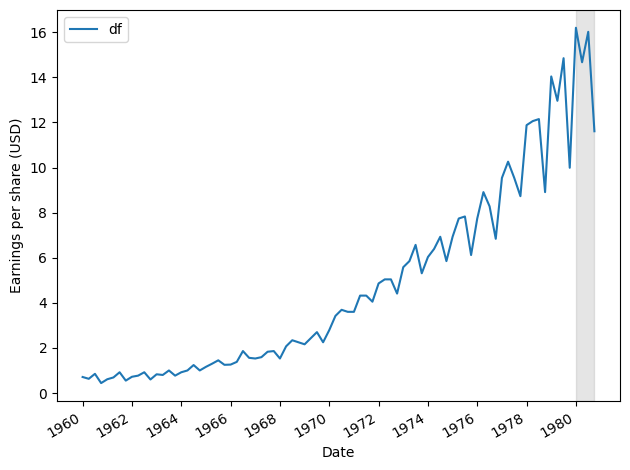

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['data'], label='df')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974,
1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

Los conjuntos de entrenamiento y prueba. El período de entrenamiento abarca desde 1960 hasta 1979 inclusive, mientras que el conjunto de prueba es el EPS trimestral reportado en 1980. Este conjunto de prueba corresponde a los últimos cuatro puntos de datos del conjunto de datos.

Para ajustar los muchos modelos ARIMA(p,d,q), definiremos la función `optimize_ARIMA`. Es casi idéntica a la función optimize_ARMA que definimos en el capítulo 6, solo que esta vez añadiremos el orden de integración d como una entrada a la función. El resto de la función se mantiene igual, ya que ajustamos los diferentes modelos y los ordenamos por AIC ascendente para seleccionar el modelo con el AIC más bajo. La función optimize_ARIMA se muestra en la siguiente lista.

1. La función toma como entradas los datos de series temporales, la lista de combinaciones únicas (p,q) y el orden de integración d.
2. Inicializa una lista vacía para almacenar cada orden (p,q) y su correspondiente AIC como una tupla.
3. Iterar sobre cada combinación única (p,q). El uso de tqdm_notebook mostrará una barra de progreso.
4. Ajusta un modelo ARIMA(p,d,q) utilizando la función SARIMAX. Especificamos simple_differencing=False para evitar la diferenciación. También especificamos disp=False para evitar imprimir mensajes de convergencia en la consola.
5. Calcula el AIC del modelo.
6. Agrega la combinación (p,q) y el AIC como una tupla a la lista de resultados.
7. Almacena la combinación (p,q) y AIC en un DataFrame.
8. Etiquete las columnas de su DataFrame.
9. Ordena el DataFrame en orden ascendente de valores AIC. Cuanto más bajo sea el AIC, mejor será el modelo.

In [31]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int)-> pd.DataFrame: #1
    results = [] #2
    for order in tqdm_notebook(order_list): #3
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]),
                            simple_differencing=False).fit(disp=False) #4
        except:
            continue
        aic = model.aic #5
        results.append([order, aic]) #6
    result_df = pd.DataFrame(results) #7
    result_df.columns = ['(p,q)', 'AIC'] #8
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True) #9
    return result_df

Con la función en su lugar, podemos definir una lista de valores posibles para los órdenes p y q. En este caso, probaremos los valores 0, 1, 2 y 3 para ambos órdenes y generaremos la lista de combinaciones únicas (p,q).

In [32]:
from itertools import product
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2
order_list = list(product(ps, qs))

Tenga en cuenta que no damos un rango de valores para el parámetro d porque tiene una definición muy específica: es el número de veces que una serie debe ser diferenciada para volverse estacionaria. Por lo tanto, debe establecerse en un valor específico, que en este caso es 2.

Además, d debe ser constante para poder comparar modelos utilizando el AIC. Variar d cambiaría la función de verosimilitud utilizada en el cálculo del valor AIC, por lo que comparar modelos utilizando el AIC como criterio ya no sería válido.

Ahora podemos ejecutar la función optimize_ARIMA usando el conjunto de entrenamiento.

In [35]:
train = df[:-4]
test = df[-4:]
result_df = optimize_ARIMA(train['data'], order_list, d)
result_df

/tmp/ipykernel_60557/2954804297.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list): #3


  0%|          | 0/16 [00:00<?, ?it/s]

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn

,"(p,q)",AIC
0,"(3, 3)",115.269418
1,"(3, 1)",115.624980
2,"(3, 2)",115.672007
3,"(3, 0)",154.430701
4,"(0, 3)",194.654716
5,"(0, 2)",209.274471
6,"(2, 3)",220.667031
7,"(1, 3)",228.267731
8,"(1, 2)",228.935776
9,"(2, 2)",229.974673


El DataFrame devuelto muestra que un valor de 3 tanto para p como para q resulta en el AIC más bajo. Por lo tanto, un modelo ARIMA(3,2,3) parece ser el más adecuado para esta situación. Ahora evaluemos la validez del modelo estudiando sus residuos.

Para hacerlo, ajustaremos un modelo ARIMA(3,2,3) en el conjunto de entrenamiento y mostraremos el diagnóstico de los residuales utilizando el método plot_diagnostics.

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


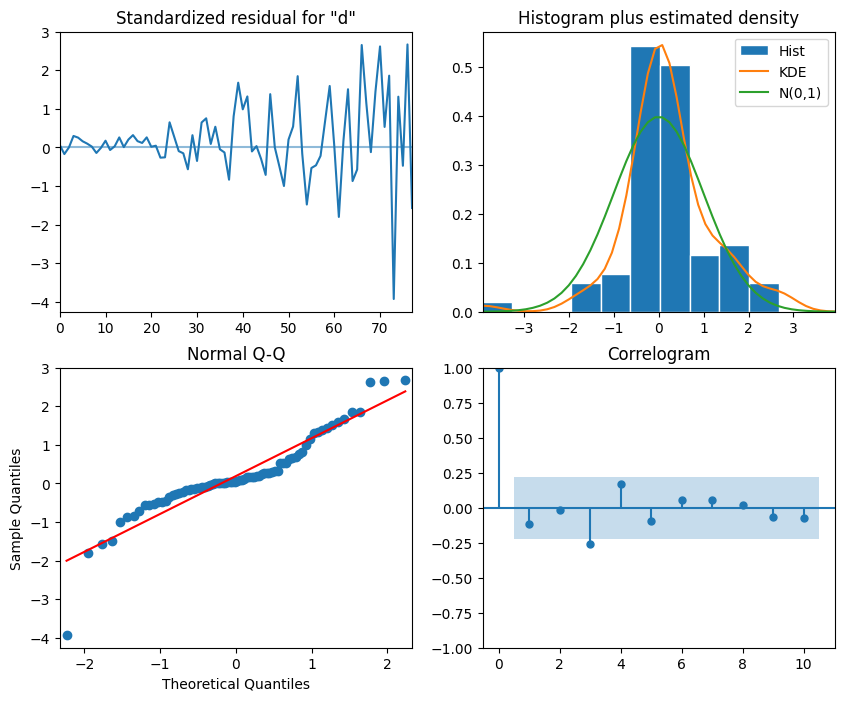

In [36]:
model = SARIMAX(train['data'], order=(3,2,3), simple_differencing=False)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10,8));

En la figura, el gráfico de la parte superior izquierda muestra los residuos a lo largo del tiempo. Aunque no hay una tendencia en los residuos, la varianza parece no ser constante, lo que es una discrepancia en comparación con el ruido blanco. En la parte superior derecha se encuentra la distribución de los residuos. Podemos ver que está bastante cerca de una distribución normal. El gráfico Q-Q nos lleva a la misma conclusión, ya que muestra una línea que es bastante recta, lo que significa que la distribución de los residuos está cerca de una distribución normal.

Finalmente, al observar el correlograma en la parte inferior derecha, podemos ver que un coeficiente parece ser significativo en el rezago 3. Sin embargo, dado que no está precedido por ningún coeficiente de autocorrelación significativo, podemos asumir que esto se debe a la casualidad. Por lo tanto, podemos decir que el correlograma no muestra coeficientes significativos después del rezago 0, al igual que el ruido blanco.

Así, desde un punto de vista cualitativo, parece que nuestros residuos están cerca del ruido blanco, lo cual es una buena señal, ya que significa que los errores del modelo son aleatorios.

El último paso es evaluar los residuos desde un punto de vista cuantitativo. Por lo tanto, aplicaremos la prueba de Ljung-Box para determinar si los residuos están correlacionados. Aplicaremos la prueba en los primeros 10 rezagos y estudiaremos los valores p. Si todos los valores p son mayores que 0.05, no podemos rechazar la hipótesis nula y concluiremos que los residuos no están correlacionados, al igual que el ruido blanco.


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = model_fit.resid
lb_test = acorr_ljungbox(residuals, lags=np.arange(1, 11))  
# Extraer solo los p-values como array
pvalue = lb_test["lb_pvalue"].values
print(pvalue)

[0.19748707 0.43529179 0.06355156 0.05552468 0.07944662 0.12090604
 0.17020362 0.23990256 0.295947   0.3453796 ]


Realizar la prueba de Ljung-Box en los primeros 10 rezagos de los residuos del modelo devuelve una lista de valores p que son todos mayores que 0.05. Por lo tanto, no rechazamos la hipótesis nula y concluimos que los residuos no están correlacionados, al igual que el ruido blanco.

Nuestro modelo ARIMA(3,2,3) ha pasado todas las verificaciones y ahora se puede utilizar para hacer pronósticos. Recuerde que nuestro conjunto de prueba son los últimos cuatro puntos de datos, que corresponden a los cuatro EPS trimestrales reportados en 1980. Como referencia para nuestro modelo, usaremos el método estacional ingenuo. Esto significa que tomaremos el EPS del primer trimestre de 1979 y lo utilizaremos como pronóstico para el EPS del primer trimestre de 1980.

Entonces, el EPS del segundo trimestre de 1979 se utilizará como pronóstico para el EPS del segundo trimestre de 1980, y así sucesivamente. Recuerda que necesitamos una referencia, o un modelo base, al modelar para determinar si el modelo que desarrollamos es mejor que un método ingenuo. El rendimiento de un modelo siempre debe evaluarse en relación con un modelo base.

In [38]:
test['naive_seasonal'] = df['data'].iloc[76:80].values

/tmp/ipykernel_60557/392237658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_seasonal'] = df['data'].iloc[76:80].values


Con nuestra línea base establecida, ahora podemos hacer pronósticos utilizando el modelo ARIMA(3,2,3) y almacenar los resultados en la columna ARIMA_pred.

In [39]:
ARIMA_pred = model_fit.get_prediction(80, 83).predicted_mean #1
test['ARIMA_pred'] = ARIMA_pred # 


/tmp/ipykernel_60557/2396237094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred #


1. Obtén los valores predichos para el año 1980.
2. Asigna las previsiones a la columna ARIMA_pred.

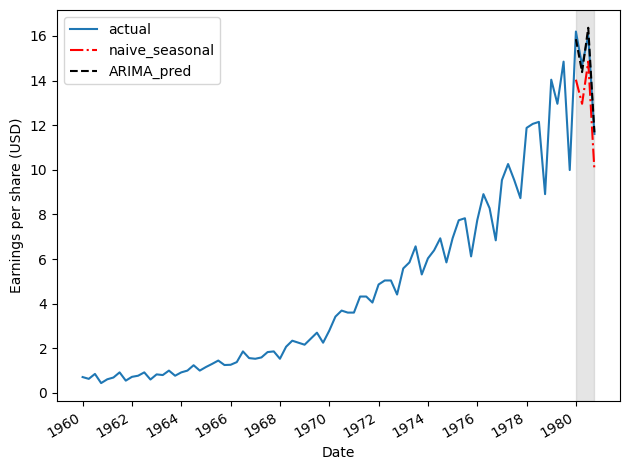

In [52]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['data'], label='actual')
ax.plot(test['date'], test['naive_seasonal'],'r-.', label='naive_seasonal')
ax.plot(test['date'], test['ARIMA_pred'],'k--', label='ARIMA_pred')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974,
1976, 1978, 1980])
ax.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()

En la figura podemos ver la previsión estacional ingenua como una línea punteada y las previsiones ARIMA(3,2,3) como una línea discontinua. El modelo ARIMA(3,2,3) predijo el EPS trimestral con un error muy pequeño.

Podemos cuantificar ese error midiendo el error absoluto porcentual medio (MAPE) y mostrar la métrica para cada método de pronóstico en un gráfico de barras.

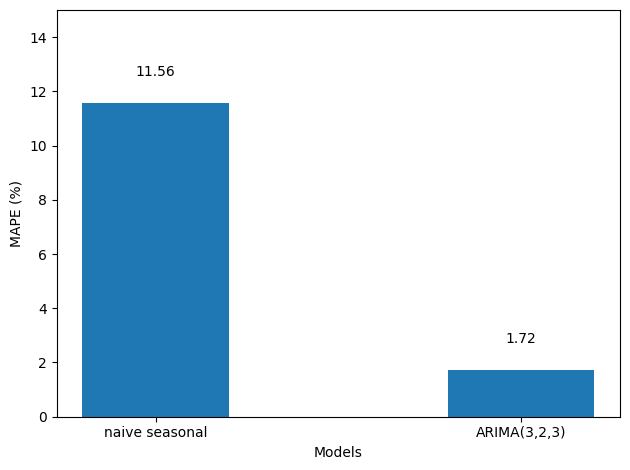

In [54]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_naive_seasonal = mape(test['data'], test['naive_seasonal'])
mape_ARIMA = mape(test['data'], test['ARIMA_pred'])
fig, ax = plt.subplots()
x = ['naive seasonal', 'ARIMA(3,2,3)']
y = [mape_naive_seasonal, mape_ARIMA]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')
plt.tight_layout()

En la figura  , se puede ver que el MAPE para la predicción estacional ingenua es del 11.56%, mientras que el MAPE para el modelo ARIMA(3,2,3) es del 1.72%, que es aproximadamente una quinta parte del valor de referencia. Esto significa que nuestras predicciones están, en promedio, un 2.19% por debajo de los valores reales. El modelo ARIMA(3,2,3) es claramente un mejor modelo que el método estacional ingenuo.

# Proximos pasos

En este capítulo, cubrimos el modelo ARIMA(p,d,q), que nos permite modelar y pronosticar series temporales no estacionarias. El orden de integración d define cuántas veces una serie debe ser diferenciado para volverse estacionaria. Este parámetro nos permite ajustar el modelo a la serie original y obtener un pronóstico en la misma escala, a diferencia del modelo ARMA(p,q), que requería que la serie fuera estacionaria para que se pudiera aplicar el modelo y que nos obligaba a revertir las transformaciones en los pronósticos.

Para aplicar el modelo ARIMA(p,d,q), añadimos un paso adicional a nuestro procedimiento general de modelado, que consiste simplemente en encontrar el valor del orden de integración. Esto corresponde al número mínimo de veces que una serie debe ser diferenciada para volverse estacionaria.

Ahora podemos agregar otra capa al modelo ARIMA(p,d,q) que nos permite considerar otra propiedad de las series temporales: la estacionalidad. Hemos estudiado el conjunto de datos de Johnson & Johnson suficientes veces para darnos cuenta de que hay patrones cíclicos claros en la serie. Para integrar la estacionalidad de una serie en un modelo, debemos usar el modelo de promedio móvil integrado autorregresivo estacional (SARIMA), o SARIMA(p,d,q)(P,D,Q)m. Este será el tema del próximo capítulo.

# Resumen

- El modelo de promedio móvil integrado autorregresivo, denotado como ARIMA(p,d,q), es la combinación del modelo autorregresivo AR(p), el orden de integración d, y el modelo de promedio móvil MA(q).
- El modelo ARIMA(p,d,q) se puede aplicar a series temporales no estacionarias y tiene la ventaja adicional de devolver pronósticos en la misma escala que la serie original.
- El orden de integración d es igual al número mínimo de veces que una serie debe ser diferenciada para volverse estacionaria.
- Un modelo ARIMA(p,0,q) es equivalente a un modelo ARMA(p,q).